# Workshop 8: Iterative Methods

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from functions import jacobi, gauss_seidel, gauss_seidel_sor

## Exercise 1

Test the Jacobi and Gauss-Seidel methods for solving the linear system $Ax = b$, where:
- $A = \begin{bmatrix}8 & 1 & 3 \\ 3 & 5 & 1 \\ 1 & 1 & 17\end{bmatrix}$
- $A = \begin{bmatrix}3 & 0 & 4 \\ 7 & 4 & 3 \\ -1 & -1 & -2\end{bmatrix}$
- $A = \begin{bmatrix}1 & 3 & 2 \\ 7 & 8 & 3 \\ 14 & 3 & 10\end{bmatrix}$
- $A = \begin{bmatrix}5 & 0 & -1 & 2 \\ -2 & 4 & 1 & 0 \\ 0 & -1 & 4 & -1 \\ 2 & 0 & 0 & 3\end{bmatrix}$
- $A = \begin{bmatrix}9 & 1 & 16 \\ 1 & 11 & 1 \\ 16 & 1 & 29\end{bmatrix}$

The right-hand side vector $b$ is chosen so that the exact solution is the vector of all ones.

Display, in a single logarithmic-scale plot, the error at each iteration for both methods and for all matrices. What do you observe?

raggio spettrale jacobi 0.38361276817058704
raggio spettrale Gauss-Seidel  0.07631935991363357


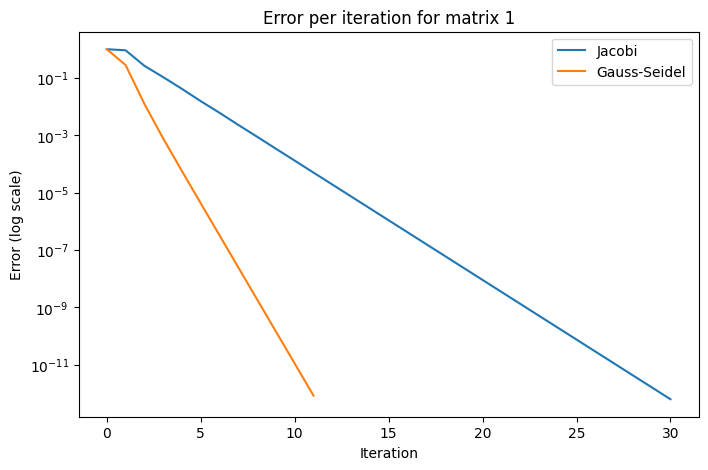

raggio spettrale jacobi 1.3748593749588478
raggio spettrale Gauss-Seidel  0.1250000000000001


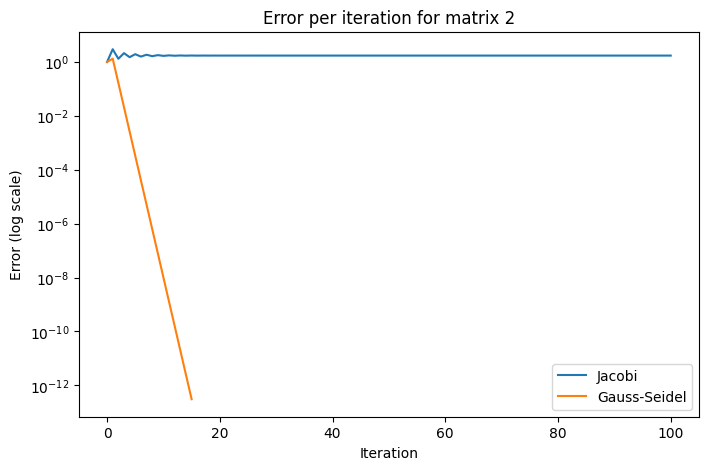

raggio spettrale jacobi 2.523802263520596
raggio spettrale Gauss-Seidel  4.67564831808269


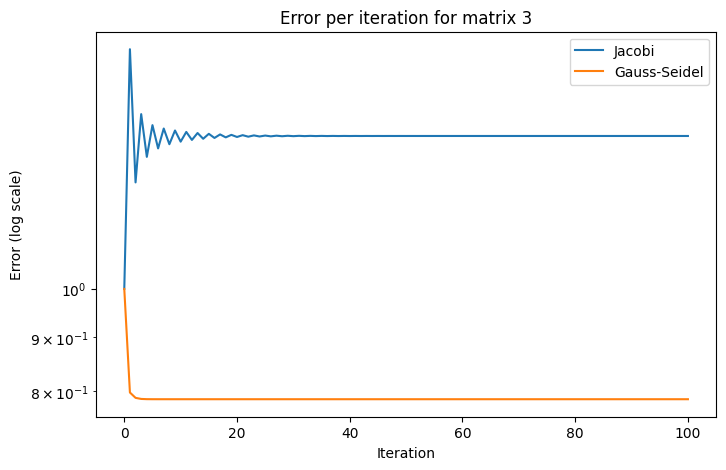

raggio spettrale jacobi 0.5287229642709425
raggio spettrale Gauss-Seidel  0.12909944487358052


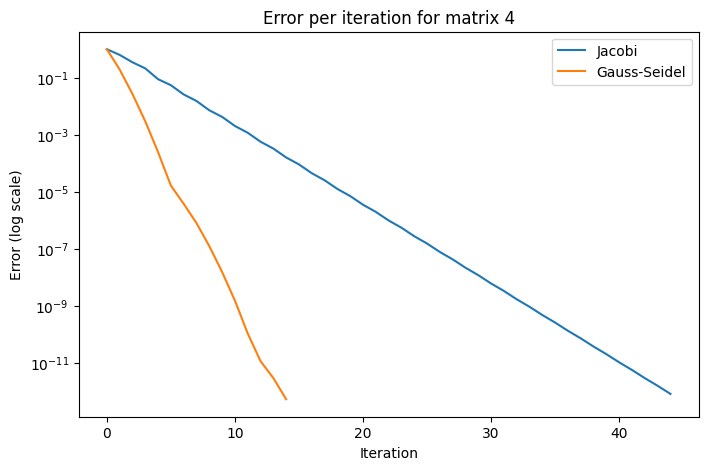

raggio spettrale jacobi 1.0025945424811646
raggio spettrale Gauss-Seidel  0.9828354478894896


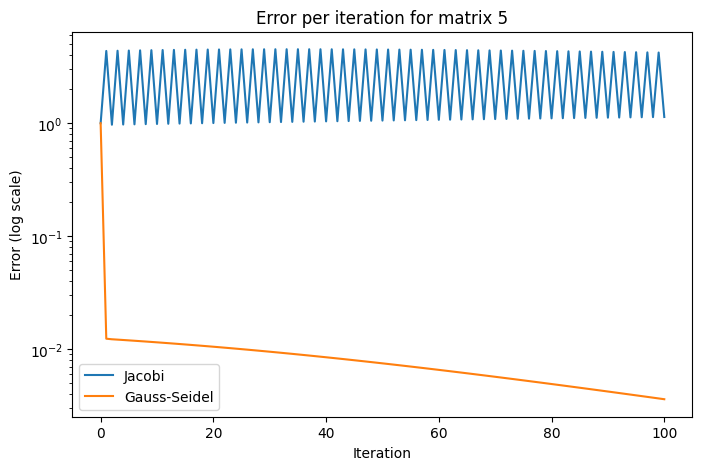

In [8]:
# Plot separate error graphs for each matrix in Exercise 1
matrices = [
    np.array([[8, 1, 3], [3, 5, 1], [1, 1, 17]], dtype=float),
    np.array([[3, 0, 4], [7, 4, 3], [-1, -1, -2]], dtype=float),
    np.array([[1, 3, 2], [7, 8, 3], [14, 3, 10]], dtype=float),
    np.array([[5, 0, -1, 2], [-2, 4, 1, 0], [0, -1, 4, -1], [2, 0, 0, 3]], dtype=float),
    np.array([[9, 1, 16], [1, 11, 1], [16, 1, 29]], dtype=float)
]

for idx, A in enumerate(matrices):
    n, m = A.shape
    x0 = np.zeros(n).reshape(n, 1)
    b = np.sum(A, axis=1).reshape(n, 1)
    x_jacobi, er_jacobi, it_jacobi = jacobi(A, b, x0)
    x_gs, er_gs, it_gs = gauss_seidel(A, b, x0)
    plt.figure(figsize=(8, 5))
    plt.semilogy(np.arange(it_jacobi), er_jacobi, label="Jacobi")
    plt.semilogy(np.arange(it_gs), er_gs, label="Gauss-Seidel")
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Error (log scale)")
    plt.title(f"Error per iteration for matrix {idx+1}")
    plt.show()

## Exercise 2

Write a function `creaPoisson(n)` that, given the order $n$ of the Poisson matrix, constructs it as follows:

$$A =
\begin{bmatrix}
4 & -1 & 0 & -1 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 \\
-1 & 4 & -1 & 0 & -1 & 0 & 0 & 0 & \cdots & 0 & 0 \\
0 & -1 & 4 & -1 & 0 & -1 & 0 & 0 & \cdots & 0 & 0 \\
-1 & 0 & -1 & 4 & -1 & 0 & -1 & 0 & \cdots & 0 & 0 \\
0 & -1 & 0 & -1 & 4 & -1 & 0 & -1 & \cdots & 0 & 0 \\
0 & 0 & -1 & 0 & -1 & 4 & -1 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & \ddots & 0 & \ddots & \ddots & \ddots & \ddots & \ddots & 0 \\
0 & 0 & 0 & 0 & -1 & 0 & -1 & 4 & -1 & 0 & -1
\end{bmatrix}
$$

Solve the linear system $Ax = b$ with Poisson matrix $A$ of order 10 and $b$ chosen so that the solution is the vector of all ones, using the Jacobi, Gauss-Seidel, and Gauss-Seidel-SOR methods (with $\omega$ chosen between 1 and 2 to minimize the spectral radius of the iteration matrix). Compare the error trends in a single logarithmic-scale plot.

raggio spettrale jacobi 0.8451732757464318
raggio spettrale Gauss-Seidel  0.7185579379397854
raggio spettrale Gauss-Seidel SOR  0.5103393892922703


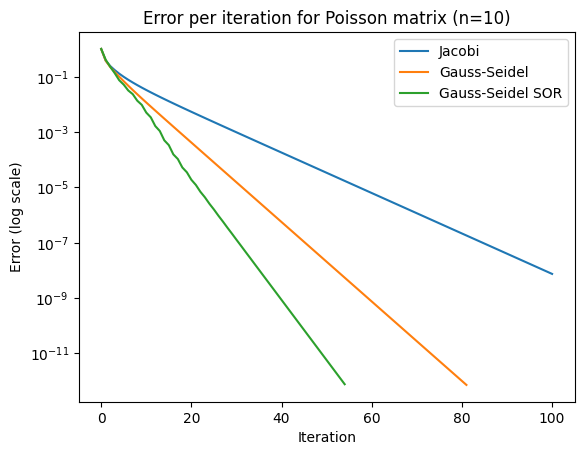

In [9]:
def creaPoisson(n):
    d = np.ones((n)) * 4
    e = -np.ones((n - 1,))
    f = -np.ones((n - 3,))
    A = np.diag(d) + np.diag(e, -1) + np.diag(e, 1) + np.diag(f, -3) + np.diag(f, 3)
    return A

A = creaPoisson(10)
b = np.sum(A, axis=1)
n, m = A.shape

x0 = np.zeros(n).reshape(n, 1)
b = np.sum(A, axis=1).reshape(n, 1)

x, er, it = jacobi(A, b, x0)
plt.semilogy(np.arange(it), er)

x, er, it = gauss_seidel(A, b, x0)
plt.semilogy(np.arange(it), er)

x, er, it = gauss_seidel_sor(A, b, x0, 1.4)
plt.semilogy(np.arange(it), er)

plt.legend(['Jacobi','Gauss-Seidel','Gauss-Seidel SOR'])
plt.xlabel('Iteration')
plt.ylabel('Error (log scale)')
plt.title('Error per iteration for Poisson matrix (n=10)')
plt.show()